In [1]:
#Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text, func

# Reflect Tables into SQLAlchemy ORM

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

#### Although a session is created. This is not the prefered method taught for class.

# Using the Inspector and the read_sql function

In [7]:
#Method taught directly from SMU Bootcamp using read_sql
# Create the inspector and connect it to the engine

# INSPECT
inspector_gadget = inspect(engine)

# get all tables
table_names = inspector_gadget.get_table_names()
for table in table_names:
    print(table)
    
    # get columns for table
    for column in inspector_gadget.get_columns(table):
        print(column)
        
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [8]:
#### READ ####
#Investigate the data frame from measurement
query = text("""
                SELECT
                    *
                FROM
                    measurement
            """)

pd.read_sql(query, engine)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [9]:
#### READ ####
#Investigate the data frame from station
query = text("""
                SELECT
                    *
                FROM
                    station
            """)

pd.read_sql(query, engine)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
 #### READ ####

query = text("""
                SELECT
                    date
                FROM
                    measurement
                group by
                    date
                order by
                    date desc
                limit 1
            """)

pd.read_sql(query, engine)

,date
0,2017-08-23


In [11]:
# Find the first recent date in the data set.
 #### READ ####

query = text("""
                SELECT
                    date
                FROM
                    measurement
                group by
                    date
                order by
                    date asc
                limit 1
            """)

pd.read_sql(query, engine)

,date
0,2010-01-01


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

 #### READ ####

query = text("""
                SELECT
                    date,
                    station,
                    prcp
                FROM
                    measurement
                WHERE
                    date >= '2016-08-23'
            """)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.read_sql(query, engine)
prcp_df.head()


,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00


In [13]:
#inspect data types
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     2230 non-null   object 
 1   station  2230 non-null   object 
 2   prcp     2021 non-null   float64
dtypes: float64(1), object(2)
memory usage: 52.4+ KB


In [14]:
#change date data type to date time
prcp_df["date"] = pd.to_datetime(prcp_df["date"])
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2230 non-null   datetime64[ns]
 1   station  2230 non-null   object        
 2   prcp     2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 52.4+ KB


In [15]:
# Sort the dataframe by date
prcp_by_date = prcp_df.dropna().sort_values(by="date", ascending=True).reset_index(drop=True)
prcp_by_date.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00519523,0.02
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00516128,0.70
4,2016-08-23,USC00513117,0.15


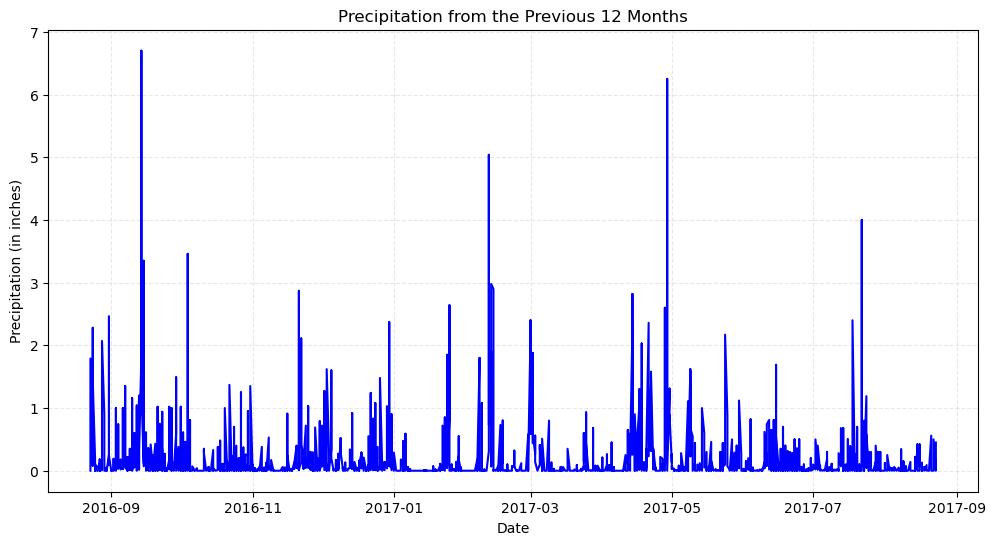

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12,6))
plt.plot(prcp_by_date.date, prcp_by_date.prcp, color="blue")
plt.xlabel("Date")
plt.ylabel("Precipitation (in inches)")
plt.title("Precipitation from the Previous 12 Months")


plt.grid(axis="both", c="lightgray", linestyle="dashed", alpha=0.5)

plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_by_date.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
query = text("""
                SELECT
                    count(DISTINCT station) as 'Number of Stations'
                FROM
                    measurement                
            """)

pd.read_sql(query, engine)

,Number of Stations
0,9


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = text("""
                SELECT
                    station,
                    count(*) as activity
                FROM
                    measurement
                GROUP BY
                    station
                ORDER BY
                    activity desc;
            """)

pd.read_sql(query, engine)

,station,activity
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = text("""
                SELECT
                    station,
                    min(tobs) as tmin,
                    max(tobs) as tmax,
                    avg(tobs) as tmean
                FROM
                    measurement
                WHERE
                    station = 'USC00519281'
            """)

pd.read_sql(query, engine)

,station,tmin,tmax,tmean
0,USC00519281,54.0,85.0,71.663781


In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = text("""
                SELECT
                    date,
                    station,
                    tobs                    
                FROM
                    measurement
                WHERE
                    station = 'USC00519281'
                    AND date >= '2016-08-23';        
            """)

tobs_by_date = pd.read_sql(query, engine)
tobs_by_date.head()


,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


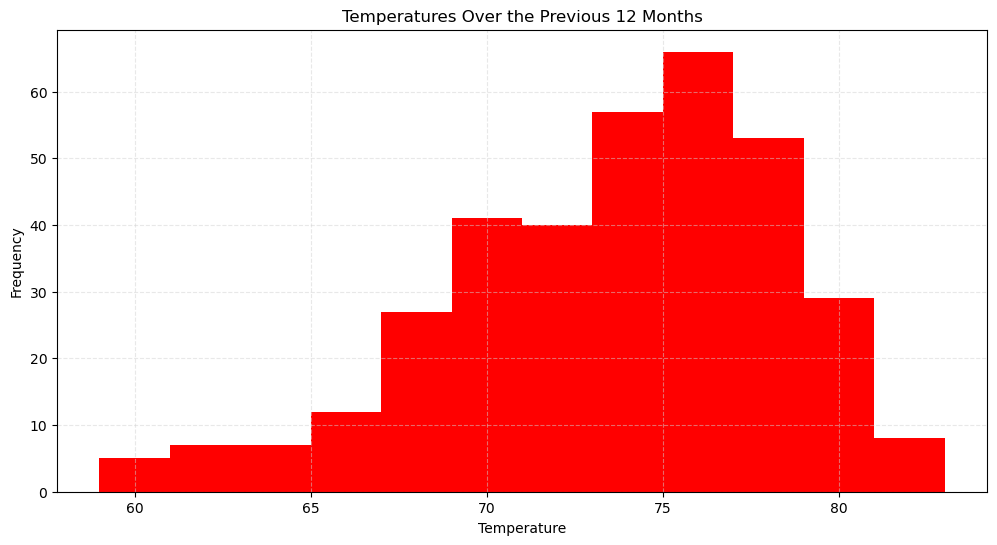

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12,6))
plt.hist(tobs_by_date.tobs, bins=12, color="red")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperatures Over the Previous 12 Months")


plt.grid(axis="both", c="lightgray", linestyle="dashed", alpha=0.5)

plt.show()

## Samples for the Flask App

In [28]:
# Calculate the lowest, highest, and average temperatures for each station based on time.
query = text("""
                SELECT
                    station,
                    date as earliest_date,
                    min(tobs) as tmin,
                    max(tobs) as tmax,
                    avg(tobs) as tmean
                FROM
                    measurement
                WHERE
                    date >= '2010-01-01'
                GROUP BY
                    station;
            """)

pd.read_sql(query, engine)

,station,start_date,tmin,tmax,tmean
0,USC00511918,2010-09-19,53.0,87.0,71.615968
1,USC00513117,2014-09-14,59.0,85.0,72.689184
2,USC00514830,2015-08-29,58.0,85.0,74.873297
3,USC00516128,2013-10-13,58.0,84.0,70.915008
4,USC00517948,2017-07-03,58.0,87.0,74.684402
5,USC00518838,2010-09-27,58.0,83.0,72.724070
6,USC00519281,2015-09-10,54.0,85.0,71.663781
7,USC00519397,2010-08-23,56.0,87.0,74.553231
8,USC00519523,2017-08-19,56.0,85.0,74.543649


In [24]:
# Close Session
session.close()